In [1]:
# TensorFlow and tf.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import tensorflow 
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tensorflow.keras.datasets.fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

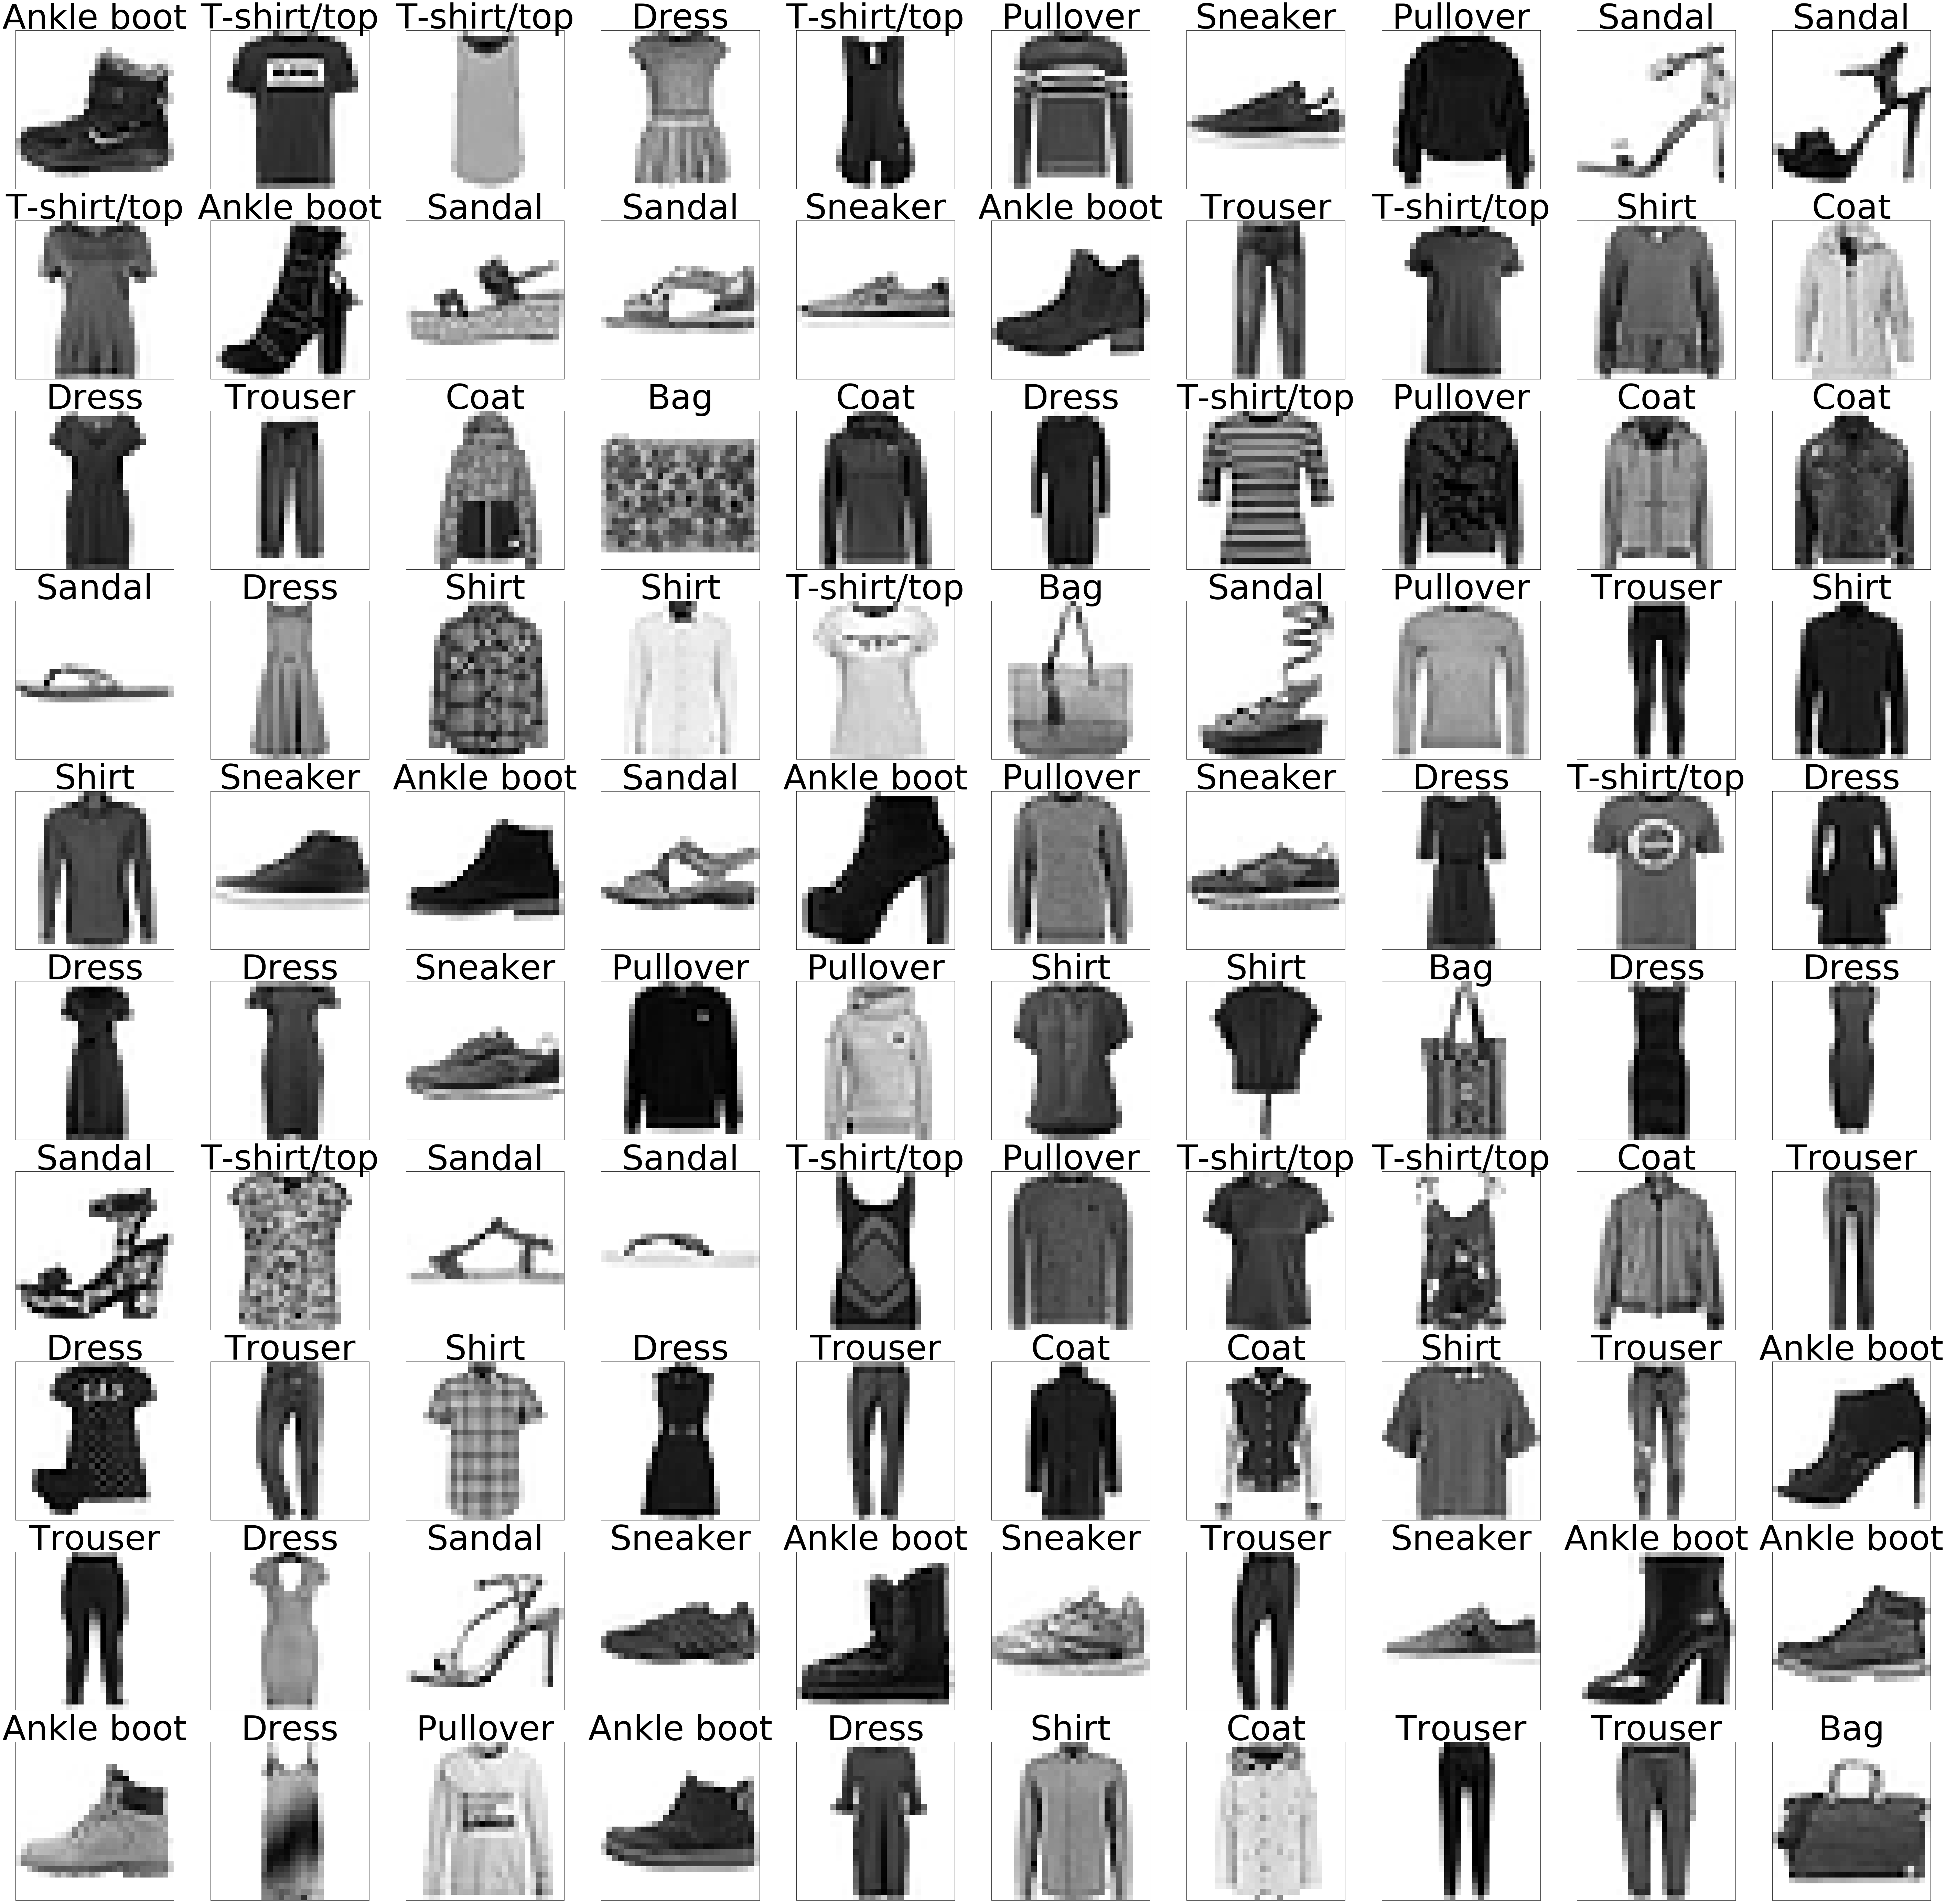

In [17]:
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(100,100))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.title(fashion_mnist[y_train[i]], fontsize=100)
plt.show()

In [18]:
img_rows, img_cols = x_train.shape[1:]

model = Sequential()
model.add(Flatten(input_shape=(img_rows, img_cols)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
Adam = tensorflow.keras.optimizers.Adam
model.compile(optimizer = Adam(lr=0.0005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
print(model.input_shape)
print(model.output_shape)

(None, 28, 28)
(None, 10)


In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.33)

Train on 40199 samples, validate on 19801 samples
Epoch 1/10
40199/40199 [==============================] - 10s 254us/sample - loss: 0.5235 - acc: 0.8180 - val_loss: 0.4539 - val_acc: 0.8374
Epoch 2/10
40199/40199 [==============================] - 10s 244us/sample - loss: 0.3894 - acc: 0.8613 - val_loss: 0.3919 - val_acc: 0.8610
Epoch 3/10
40199/40199 [==============================] - 10s 247us/sample - loss: 0.3465 - acc: 0.8743 - val_loss: 0.3396 - val_acc: 0.8783
Epoch 4/10
40199/40199 [==============================] - 10s 252us/sample - loss: 0.3157 - acc: 0.8839 - val_loss: 0.3258 - val_acc: 0.8850
Epoch 5/10
40199/40199 [==============================] - 10s 257us/sample - loss: 0.2941 - acc: 0.8910 - val_loss: 0.3429 - val_acc: 0.8755
Epoch 6/10
40199/40199 [==============================] - 10s 259us/sample - loss: 0.2760 - acc: 0.8969 - val_loss: 0.3562 - val_acc: 0.8728
Epoch 7/10
40199/40199 [==============================] - 10s 260us/sample - loss: 0.2621 - acc: 0.9030 

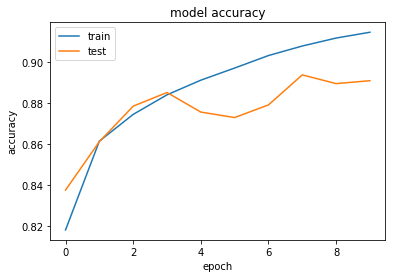

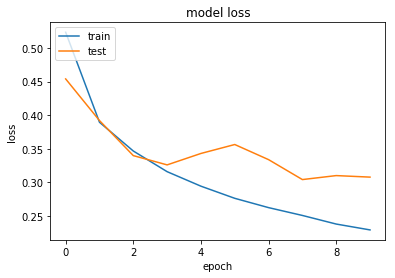

In [13]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Pullover


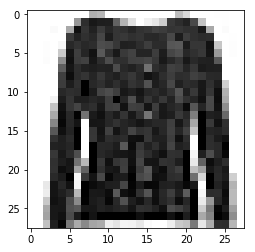

In [22]:
testID = 89
fashion_mnist = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(x_test[testID], cmap=plt.cm.binary)
out = model.predict(x_test[testID].reshape(1,img_rows, img_cols))
print(fashion_mnist[np.argmax(out)])

In [16]:
model.save_weights('fashion_mnist_weights.h5')
model.load_weights('fashion_mnist_weights.h5')